# 911 Calls Project

For this project I have analyzed some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
**Importing numpy and pandas**

In [362]:
import numpy as np
import pandas as pd

**Importing visualization libraries and set %matplotlib inline.**

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [364]:
df = pd.read_csv('911.csv')

**Checking the info() of the df**

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Checking the head of df**

In [366]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Answering Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [367]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [340]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**'title' column, how many unique title codes are there?**

In [247]:
df['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I have used .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.*

In [248]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [249]:
df['Reason'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Used seaborn to create a countplot of 911 calls by Reason.**

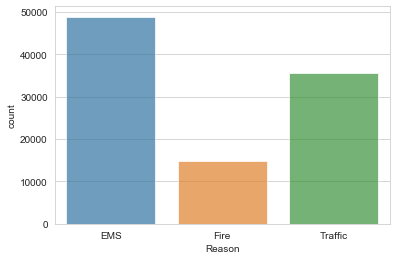

In [341]:
sns.countplot(data= df, x=df['Reason'], alpha=0.7)

___
**Beginning to focus on time information. Determining the data type of the objects in the timeStamp column**

In [342]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Since these timestamps are still strings. Used [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [368]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Grabbing specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

In [253]:
df['Hour'] = df['timeStamp'].apply(lambda ts: ts.hour)
df['Month'] = df['timeStamp'].apply(lambda ts: ts.month)
# df['Day of Week'] = df['timeStamp'].apply(lambda ts: ts.dayofweek)

**The Day of Week is an integer 0-6. Used the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [369]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [370]:
df['Day of Week'] = df['timeStamp'].apply(lambda d: dmap.get(d.dayofweek))

**Used seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

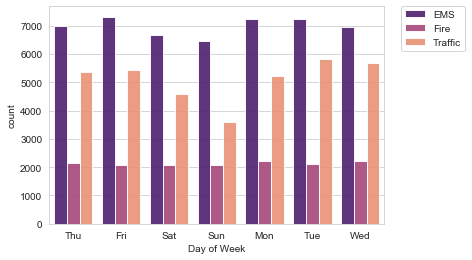

In [346]:
sns.countplot(data= df, x= 'Day of Week', hue= 'Reason', palette='magma', alpha=0.9).legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now the same for Month:**

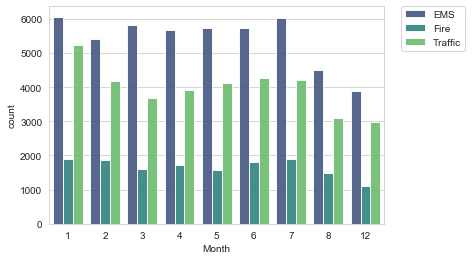

In [347]:
sns.countplot(data=df, x='Month', hue='Reason', palette='viridis', alpha=0.9).legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Noticed something strange about the Plot.**

_____

*Noticed it was missing some Months,  have attempted to fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, needed to do some work with pandas...*

*Created a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Used the head() method on this returned DataFrame.*

In [348]:
byMonth = df.groupby('Month').count()
byMonth.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101


**Created a simple plot off of the dataframe indicating the count of calls per month.**

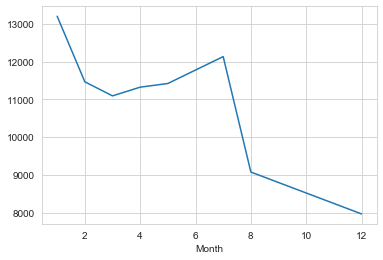

In [371]:
# sns.set_style('whitegrid')
byMonth['twp'].plot()

**Used seaborn's lmplot() to create a linear fit on the number of calls per month. Had to reset the index to a column.**

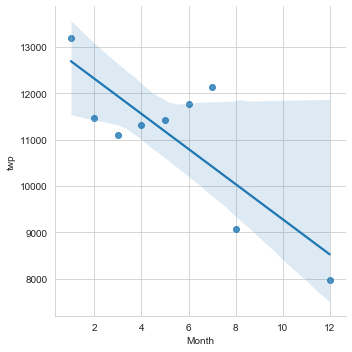

In [372]:
sns.lmplot(x='Month', y='twp', data= byMonth.reset_index())

**Created a new column called 'Date' that contains the date from the timeStamp column.Needed to use .apply along with the .date() method.** 

In [351]:
df['Date'] = df['timeStamp'].apply(lambda ts: ts.date())

**groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [352]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


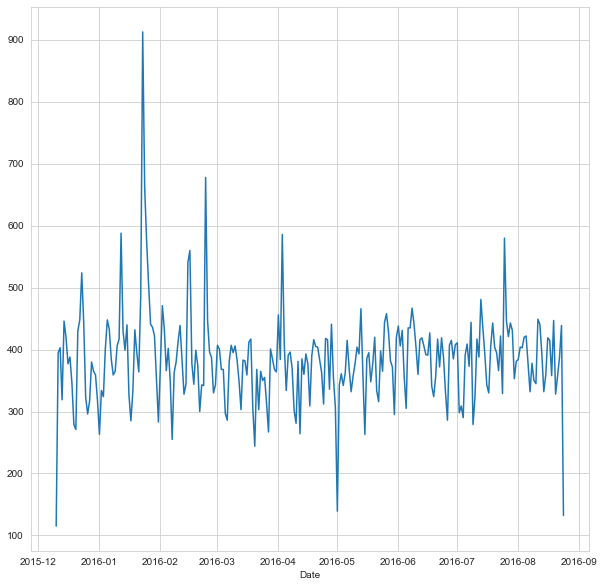

In [353]:
df.groupby('Date').count()['twp'].plot(figsize=(10,10))

**Recreated this plot but created 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1, 'Traffic')

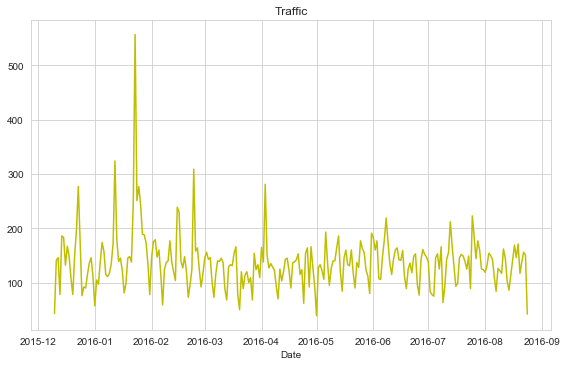

In [354]:
df[df['Reason'] == "Traffic"].groupby('Date').count()['twp'].plot(color='y', figsize= (8,5))
plt.tight_layout()
plt.title("Traffic")

Text(0.5, 1, 'Fire')

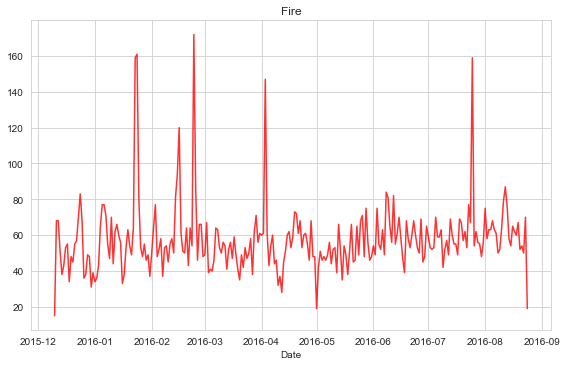

In [355]:
df[df['Reason'] == "Fire"].groupby('Date').count()['twp'].plot(color='Red', figsize= (8,5),  alpha=0.8)
plt.tight_layout()
plt.title("Fire")

Text(0.5, 1, 'EMS')

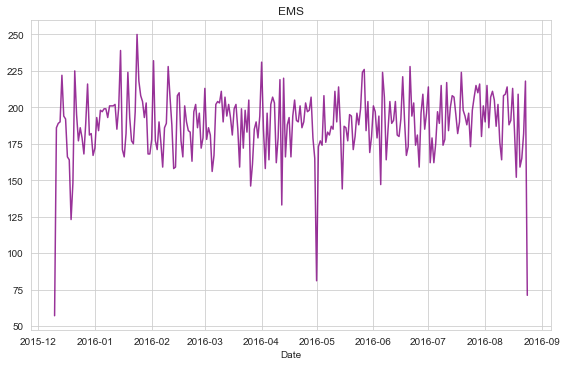

In [356]:
df[df['Reason'] == "EMS"].groupby('Date').count()['twp'].plot(color='purple', figsize= (8,5),  alpha=0.8)
plt.tight_layout()
plt.title("EMS")

____
**Creating  heatmaps with seaborn. First need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I found trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method preferable.**

In [357]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**HeatMap using this new DataFrame.**

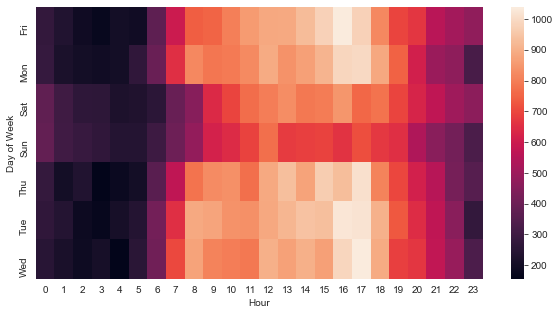

In [358]:
plt.figure(figsize=(10,5))
sns.heatmap(data=dayHour)

**Clustermap using this DataFrame.**

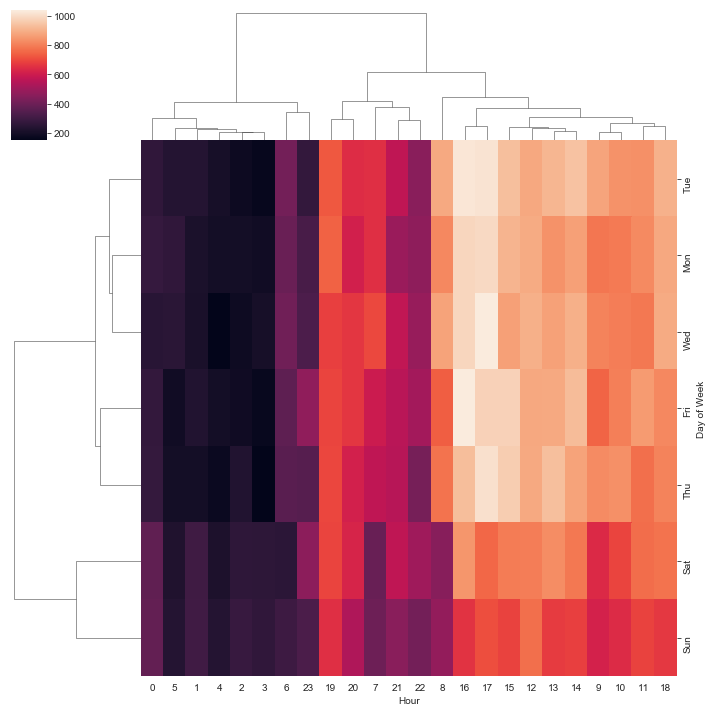

In [328]:
sns.clustermap(dayHour)

**Repeated these same plots and operations, for a DataFrame that shows the Month as the column.**

In [359]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


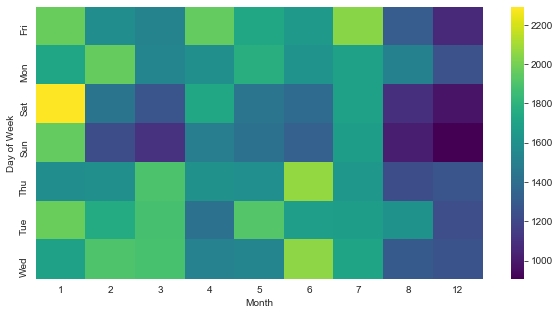

In [360]:
plt.figure(figsize=(10,5))
sns.heatmap(dayMonth, cmap='viridis')

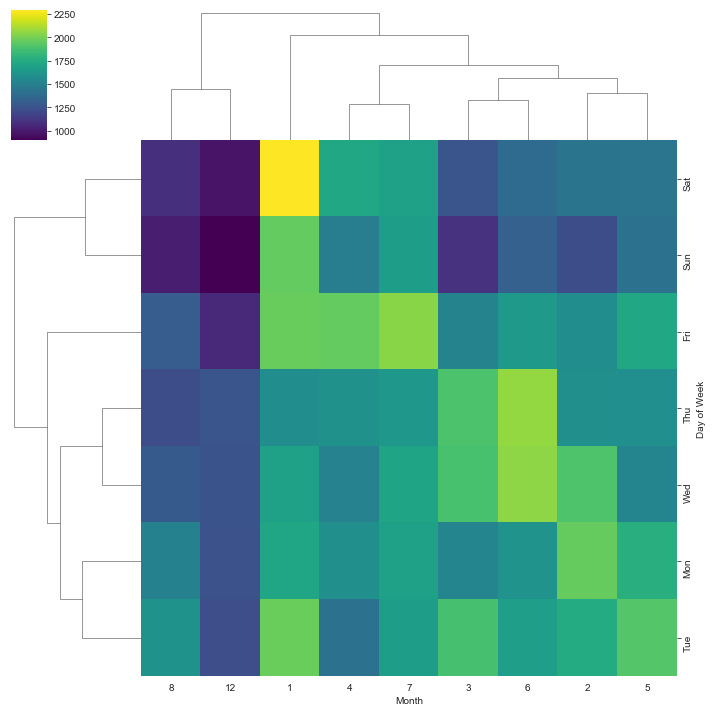

In [361]:
sns.clustermap(dayMonth, cmap='viridis')

# Thank you!